# PRÁCTICA 1 EDA

Frida Ibarra y Gema Romero

Este dataset se compone de solicitudes de préstamos, donde cada instancia representa un solicitante (individuo). Cabe resaltar que, de acuerdo con la descripción del origen de los datos, se ha asegurado que no haya información que comprometa la privacidad de los usuarios. 

**Objetivos del Trabajo:** 
Los objetivos principales de esta primera práctica son:

1. Familiarizarnos con el dataset y sus características.
2. Realizar un análisis de las variables que lo componen, así como una evaluación general de las instancias.
3. Comprender la distribución de los datos, las relaciones entre las variables y, especialmente, su relación con la variable objetivo (Target), que indica si el solicitante tuvo dificultades para pagar (valor 1) o no (valor 0).
4. Preparar los datos para aplicar modelos de Machine Learning en futuras entregas.
5. Extraer conclusiones sobre la estructura del dataset, sus principales componentes y los patrones identificados a partir del análisis exploratorio.
6. Este enfoque nos permitirá establecer una base sólida para el trabajo con modelos predictivos.

### IMPORTACIÓN DE LIBRERÍAS

In [18]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sweetviz as sv #esta yo no la tenia -->!pip install sweetviz
from termcolor import colored, cprint #esta tampoco -->!pip install termcolor
import sys
import plotly.express as px# esta tampoco la tenia-->!pip install plotly (no me va, lo te tenido que hacer con matplotlib por qeu da errores de compatibilidad)
import os
import missingno as msno
from rich.console import Console
from rich.text import Text


#### FUNCIONES AUXILIARES

In [2]:
os.getcwd()

'/Users/frida23/Desktop/Master Ciencia de Datos/Aprendizaje Automático/Practica1_EDA/notebooks'

In [19]:
import sys
sys.path.append('../src')  # Asegúrate de que ../src es la carpeta donde está Funciones_Ayuda.py
import Funciones_Ayuda as fa  # Ahora debería importarse correctamente
sys.path.remove('../src')


### IMPORTACIÓN DEL DATASET 

In [4]:
# Obtener la ruta del directorio de trabajo actual
ruta_actual = os.getcwd()
ruta_actual

'/Users/frida23/Desktop/Master Ciencia de Datos/Aprendizaje Automático/Practica1_EDA/notebooks'

In [20]:
#Importación del dataset

data = '../data/application_data.csv'
df_loans = pd.read_csv(data)

In [6]:
df_loans.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#También se va a importar el diccionario de datos del dataset 

data_description = pd.read_excel('../data/columns_description.xlsx') 
data_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### ANÁLISIS PRELIMINAR DEL DATASET 

In [8]:
# 1 Dimensiones del Dataset 
df_loans.shape

(307511, 122)

El dataset cuenta con 122 variables y 307.511 instancias

In [9]:
# Número de valores nulos por columna
nulos_por_columna = df_loans.isnull().sum()

# Porcentaje de valores nulos por columna (nulos por columna dividido entre el total de filas)
porcentaje_nulos_por_columna = (nulos_por_columna / df_loans.shape[0]) * 100

# Crear un DataFrame con los resultados
nulos_df = pd.DataFrame({
    'nulos': nulos_por_columna,
    'porcentaje': porcentaje_nulos_por_columna
})

# Mostrar el DataFrame ordenado por el porcentaje de nulos
nulos_df = nulos_df.sort_values(by='porcentaje', ascending=False)
print(nulos_df.to_string())

                               nulos  porcentaje
COMMONAREA_MEDI               214865   69.872297
COMMONAREA_AVG                214865   69.872297
COMMONAREA_MODE               214865   69.872297
NONLIVINGAPARTMENTS_MODE      213514   69.432963
NONLIVINGAPARTMENTS_AVG       213514   69.432963
NONLIVINGAPARTMENTS_MEDI      213514   69.432963
FONDKAPREMONT_MODE            210295   68.386172
LIVINGAPARTMENTS_MODE         210199   68.354953
LIVINGAPARTMENTS_AVG          210199   68.354953
LIVINGAPARTMENTS_MEDI         210199   68.354953
FLOORSMIN_AVG                 208642   67.848630
FLOORSMIN_MODE                208642   67.848630
FLOORSMIN_MEDI                208642   67.848630
YEARS_BUILD_MEDI              204488   66.497784
YEARS_BUILD_MODE              204488   66.497784
YEARS_BUILD_AVG               204488   66.497784
OWN_CAR_AGE                   202929   65.990810
LANDAREA_MEDI                 182590   59.376738
LANDAREA_MODE                 182590   59.376738
LANDAREA_AVG        

Es posible identificar rápidamente las variables con un alto porcentaje de valores nulos, y algunas de ellas presentan una proporción muy elevada, cercana al 70% de los datos. Más adelante, se deberá considerar si es adecuado eliminar alguna de estas variables.

In [10]:
df_datatypes = pd.DataFrame(df_loans
                            .dtypes.value_counts(normalize=True)
                            .mul(100).rename('percent').reset_index()
                            .round(0)
)
print('El dataframe cuenta con los siguientes tipos de datos (%): ')
df_datatypes


El dataframe cuenta con los siguientes tipos de datos (%): 


,index,percent
0,float64,53.0
1,int64,34.0
2,object,13.0


La distribución de los tipos de variables también es un factor a tener muy en cuenta, a priori el tipo de avriable que predomina es float con un 53% de los datos, sin embargo se deberá profundizar en el analisis de dichas variables para derterminar si dicho porcentaje refleja la realidad de los datos.

In [11]:
# Seleccionar las columnas categóricas
categorical_var = df_loans.select_dtypes(include=['object', 'category'])

# Mostrar los tipos de datos de las columnas categóricas
print(categorical_var.dtypes)

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object


Esta información obtenida no es del todo confiable ya que pueden haber variales categóricas codificadas lo que implicaría que no aparecen en el listado obtenido 

In [12]:
df_loans.dtypes.to_dict()

{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMB

In [13]:
df_loans.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Se puede ver que hay algunas variables con valores booleanos y también csategóricos, lo que es importante destacar ya que a pesar de que figuren con un número el tratamiento que reciben es distinto.

In [14]:
duplicated_columns = df_loans.columns[df_loans.columns.duplicated()].tolist()
duplicated_columns

[]

Se puede confrimar que no existen columnas duplicadas

### Estudio de la variable OBJETIVO o TARGET

La variable objetivo es la variable Target   

0: Cliente SIN dificultades de pago    
1: Cliente CON dificultades de pago

Se va a llevar a cabo un estudio de la distribición de los clientes dentro de la variable objetivo.

In [15]:
# Crear el DataFrame de la variable TARGET con el conteo de valores
target_df_count = df_loans['TARGET'].value_counts().reset_index()

#Crea el dataframe de la variable TARGET y su distribución en porcentaje
target_df_percent = df_loans['TARGET']\
    .value_counts(normalize=True)\
    .mul(100).rename('percent').reset_index()\
    .round(2)

#Mergear los dataframes
target_df_merge = pd.merge(target_df_count, target_df_percent, on='TARGET', how='inner')
target_df_merge

,TARGET,count,percent
0,0,282686,91.93
1,1,24825,8.07


Se va a prodecder a graficar la tabla obtenida para mayor claridad

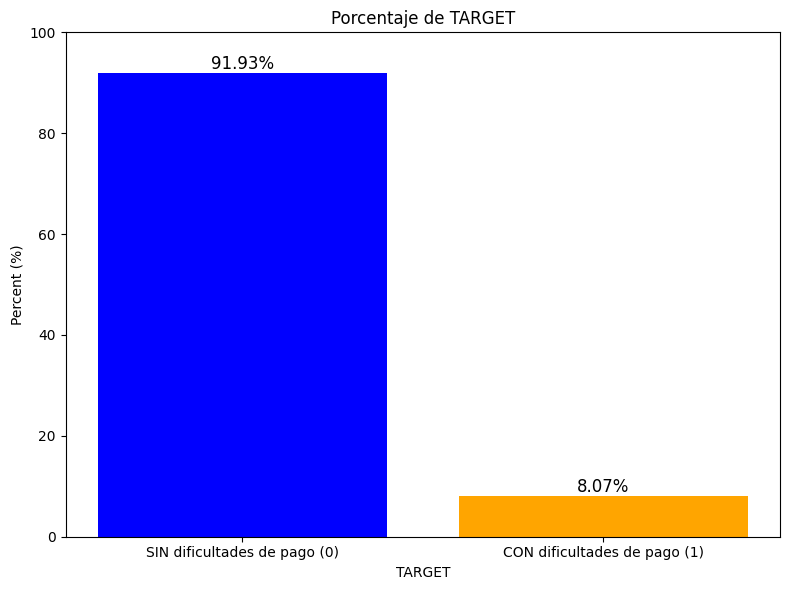

In [16]:
fig, ax = plt.subplots(figsize = (8,6)) #cuadrícula

# Crear gráfico de barras
bar_plot= plt.bar(target_df_merge['TARGET'], target_df_merge['percent'], color=['blue', 'orange'])

#ajustar el limite superior del eje y
plt.ylim(0, 100)

# Agregar etiquetas con el porcentaje de cada valor encima de las barras
for bar in bar_plot:
    yvalue = bar.get_height()  # Obtener la altura de cada barra
    plt.text(bar.get_x() + bar.get_width() / 2, yvalue + 0.02, f'{yvalue:.2f}%', 
             ha='center', va='bottom', fontsize=12)
    

# Agregar etiquetas y título al gráfico
plt.xlabel('TARGET')
ax.set_xticks([0,1], labels=['SIN dificultades de pago (0)', 'CON dificultades de pago (1)'])
plt.ylabel('Percent (%)')
plt.title('Porcentaje de TARGET')
plt.xticks(target_df_merge['TARGET'])  # Asegura que las etiquetas del eje X sean correctas
plt.tight_layout()
plt.show()

_Conclusiones_:
 
En este caso un 91% de los clientes NO tuvieron alguna dificultad a la hora de hacer frente a los pagos correspondientes, mientras que un 8,07% de los clientes tuvieron retrasos en el pago de sus respectivos adeudos.
Por ello se puede afirmar que la muestra se encuentra **DESBALANCEADA**

#### DATOS MISSING (NA)

Previamente a tratar los valores missing, es importante analizar el valor que aportan a la muestra, es decir, a la variable objetivo. Se debe tener en cuenta que pueden encontrarse variables que aporten poco valor, un valor relevante o que los usuarios pueden tener derecho a no dar ese dato. Por ello, se va a distinguir claramente entre ellas para no perder calidad de datos durante el análisis.

Con el finde examinar la completitud de los datos se ha realizado una gráfica para cada variable donde se puede ver con cñaridad cuales son las que concentran un mayor porcentaje de NA (completitud de los datos)

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

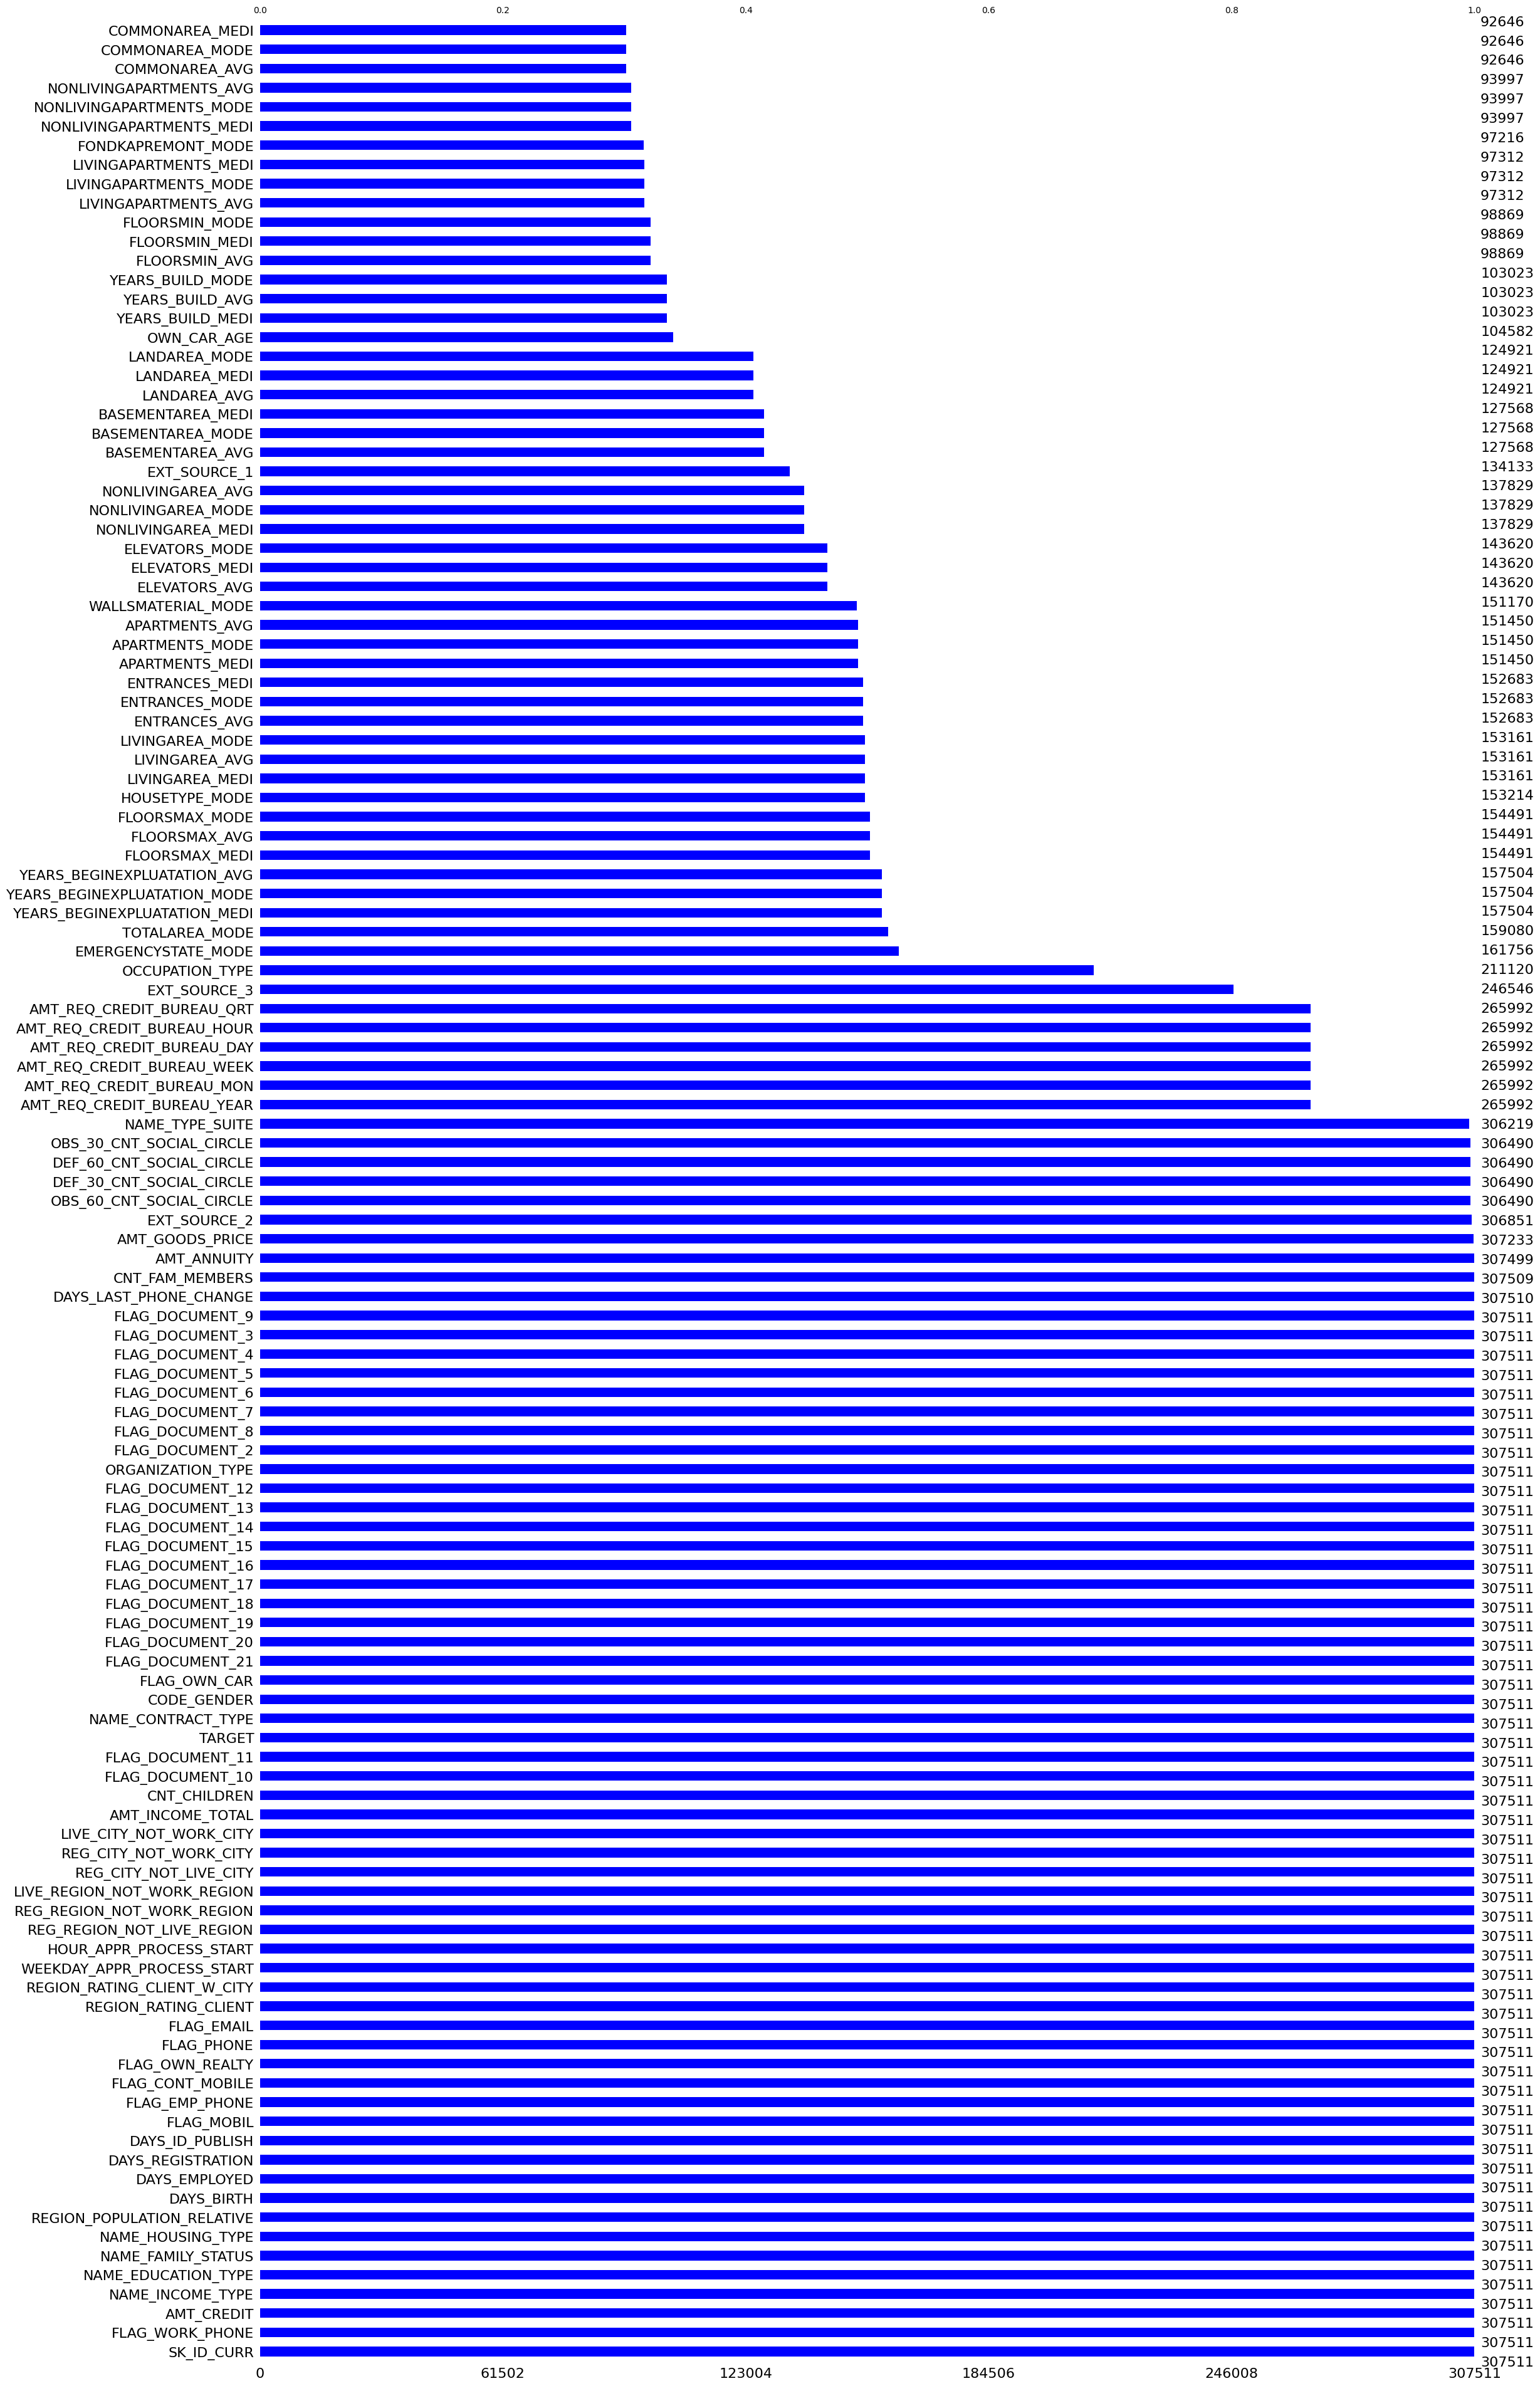

In [17]:
#Para visualizar de manera eficaz las variables con valores faltantes (completitud de los datos):
msno.bar(df_loans, filter="Top", sort = 'descending', color = 'blue')

#Cantidad de valores missing
missing_df = df_loans.loc[:, df_loans.isna().any()].isna().sum()
missing_df

In [4]:
resultados=fa.relacion_nulos_target(df_loans)
print(resultados)

{'AMT_ANNUITY': TARGET
0    0.004245
1    0.000000
Name: AMT_ANNUITY, dtype: float64, 'AMT_GOODS_PRICE': TARGET
0    0.090914
1    0.084592
Name: AMT_GOODS_PRICE, dtype: float64, 'NAME_TYPE_SUITE': TARGET
0    0.432282
1    0.281974
Name: NAME_TYPE_SUITE, dtype: float64, 'OWN_CAR_AGE': TARGET
0    65.684187
1    69.482377
Name: OWN_CAR_AGE, dtype: float64, 'OCCUPATION_TYPE': TARGET
0    31.877419
1    25.289023
Name: OCCUPATION_TYPE, dtype: float64, 'CNT_FAM_MEMBERS': TARGET
0    0.000707
1    0.000000
Name: CNT_FAM_MEMBERS, dtype: float64, 'EXT_SOURCE_1': TARGET
0    56.107129
1    59.500504
Name: EXT_SOURCE_1, dtype: float64, 'EXT_SOURCE_2': TARGET
0    0.215080
1    0.209466
Name: EXT_SOURCE_2, dtype: float64, 'EXT_SOURCE_3': TARGET
0    19.558096
1    22.868077
Name: EXT_SOURCE_3, dtype: float64, 'APARTMENTS_AVG': TARGET
0    50.153173
1    57.542800
Name: APARTMENTS_AVG, dtype: float64, 'BASEMENTAREA_AVG': TARGET
0    57.981294
1    64.604230
Name: BASEMENTAREA_AVG, dtype: float64

### ANÁLISIS DEl RESTO DE LAS VARIABLES

In [23]:
df_loans = df_loans.apply(lambda x: x.astype(bool).astype(int) if x.isin([0, 1]).all() else x)

In [24]:
resumen_variables=fa.data_summary(df_loans)
print(resumen_variables)

SK_ID_CURR (numeric) : (Type: int64) Range = [100002.00 to 456255.00], Mean = 278180.52

TARGET (boolean) : (Type: int64) Unique: [1, 0]

NAME_CONTRACT_TYPE (categoric) : (Type: object) Values: ['Cash loans' 'Revolving loans']

CODE_GENDER (categoric) : (Type: object) Values: ['M' 'F' 'XNA']

FLAG_OWN_CAR (categoric) : (Type: object) Values: ['N' 'Y']

FLAG_OWN_REALTY (categoric) : (Type: object) Values: ['Y' 'N']

CNT_CHILDREN (numeric) : (Type: int64) Range = [0.00 to 19.00], Mean = 0.42

AMT_INCOME_TOTAL (numeric) : (Type: float64) Range = [25650.00 to 117000000.00], Mean = 168797.92

AMT_CREDIT (numeric) : (Type: float64) Range = [45000.00 to 4050000.00], Mean = 599026.00

AMT_ANNUITY (numeric) : (Type: float64) Range = [1615.50 to 258025.50], Mean = 27108.57

AMT_GOODS_PRICE (numeric) : (Type: float64) Range = [40500.00 to 4050000.00], Mean = 538396.21

NAME_TYPE_SUITE (categoric) : (Type: object) Values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'] ...

NAME_

Se puede observar que hay una gran variedad de tipos de datos para las variables de tipo numñericas sobre todo ya que en algunos de los casos se encnentran codificadas lo que significa que realmente son de tipo categóricas a pesar de figurar cono numérica 

In [25]:
# Convertir la columna de float a object, conservando los NA
df_loans["CNT_FAM_MEMBERS"] = df_loans["CNT_FAM_MEMBERS"].astype('object')

Se ha detectado que la columna NT_FAM_MEMBERS contiene valores que están considerados apriori como de tipo numérica cuando realmente es una variable categórica 

In [26]:
# Llamar a la función y guardar los resultados en variables
col_bool, col_cat, col_num = fa.categorizar_columnas(df_loans)

In [27]:
types_count = pd.DataFrame([['Boolean',len(col_bool)]
                                ,['Categoric',len(col_cat)]
                                ,['Numeric',len(col_num)]]
                               , columns=['Var_type','Count'])
types_count

,Var_type,Count
0,Boolean,33
1,Categoric,17
2,Numeric,72


A priori el dataset tiene una predominancia de variables numéricas (72), lo que sugiere que el análisis se centrará en técnicas estadísticas que manejen datos numéricos. Hay una cantidad moderada de variables booleanas (33), útiles para modelos de clasificación. Las variables categóricas (17) son menores, pero requieren codificación para su uso en modelos. En general, el dataset requiere un enfoque equilibrado para manejar las distintas transformaciones de datos según su tipo. Sin embargo se deberá profundizar algo mas en el análisis ya  que es posible que dentro de las variables numéricas se engloben variables que en esencia son categórica.

/var/folders/35/sjs2jnz13bdfcd255k5413dr0000gn/T/ipykernel_6516/476858482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Var_type', y='Count', data=types_count, palette="pink")


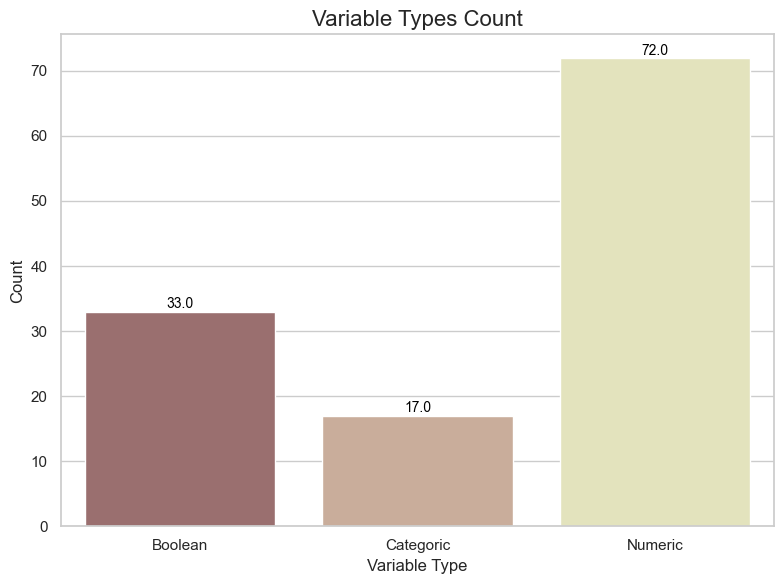

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Var_type', y='Count', data=types_count, palette="pink")

# Añadir etiquetas con el total encima de cada barra
for bar in ax.patches:  # `ax.patches` contiene las barras del gráfico
    total = bar.get_height()  # Obtener la altura de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición en X centrada
        total + 0.5,                        # Posición en Y un poco arriba
        f'{total}',                         # Texto con el total
        ha='center', fontsize=10, color='black'
    )

# Añadir títulos y etiquetas
plt.title('Variable Types Count', fontsize=16)
plt.xlabel('Variable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En esta tabla se puede ver que hay claramente un número superior de variables de tipo Numérico seguido de Categórico y por último de variables buleanas

In [ ]:
for col in col_bool:  # col_bool es la lista con nombres de columnas booleanas
    print(f"Frecuencia relativa de {col}:")
    print(df_loans[col].value_counts(normalize=True))
    print()  #

Frecuencia relativa de TARGET:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_MOBIL:
FLAG_MOBIL
1    0.999997
0    0.000003
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_EMP_PHONE:
FLAG_EMP_PHONE
1    0.819889
0    0.180111
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_WORK_PHONE:
FLAG_WORK_PHONE
0    0.800632
1    0.199368
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_CONT_MOBILE:
FLAG_CONT_MOBILE
1    0.998133
0    0.001867
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_PHONE:
FLAG_PHONE
0    0.718934
1    0.281066
Name: proportion, dtype: float64

Frecuencia relativa de FLAG_EMAIL:
FLAG_EMAIL
0    0.94328
1    0.05672
Name: proportion, dtype: float64

Frecuencia relativa de REG_REGION_NOT_LIVE_REGION:
REG_REGION_NOT_LIVE_REGION
0    0.984856
1    0.015144
Name: proportion, dtype: float64

Frecuencia relativa de REG_REGION_NOT_WORK_REGION:
REG_REGION_NOT_WORK_REGION
0    0

Para este caso hay varias variables que siguen una distribución desbalanceada, mas concretamente las variables relacionadas con los documentos presentados. Dichas variables muestran que a excepción de FLAG_DOCUMENT_3, el resto prácticamente no tuvo aportación de dicha documentación ya que en cierto punto es un comportamiento a corde con la variable "TARGET" ya que como se mencionaba antes, la muestra está debalanceda y por ello aquellos clientes que no tuvieron dificultades de pago fueron considerados clientes más seguros por lo que no se les solicitó tanta documentación lo que puede ser un indicador de que su perfil de riesgo se consideró mas bajo.

In [ ]:
cat_vars = df_loans[col_cat].dtypes.reset_index().rename(columns={'index':'Var',0:'dtype'})
cat_vars

,Var,dtype
0,NAME_CONTRACT_TYPE,object
1,CODE_GENDER,object
2,FLAG_OWN_CAR,object
3,FLAG_OWN_REALTY,object
4,NAME_TYPE_SUITE,object
5,NAME_INCOME_TYPE,object
6,NAME_EDUCATION_TYPE,object
7,NAME_FAMILY_STATUS,object
8,NAME_HOUSING_TYPE,object
9,OCCUPATION_TYPE,object


In [ ]:
cat_vars_count = cat_vars.dtype.value_counts().sort_values().reset_index()
cat_vars_count

,dtype,count
0,object,17


In [ ]:
num_vars=df_loans[col_num].dtypes.reset_index().rename(columns={'index':'Var',0:'dtype'})
num_vars

,Var,dtype
0,SK_ID_CURR,int64
1,CNT_CHILDREN,int64
2,AMT_INCOME_TOTAL,float64
3,AMT_CREDIT,float64
4,AMT_ANNUITY,float64
...,...,...
67,AMT_REQ_CREDIT_BUREAU_DAY,float64
68,AMT_REQ_CREDIT_BUREAU_WEEK,float64
69,AMT_REQ_CREDIT_BUREAU_MON,float64
70,AMT_REQ_CREDIT_BUREAU_QRT,float64


In [ ]:
num_vars_count = num_vars.dtype.value_counts().sort_values().reset_index().rename(columns={'dtype':'type','count':'count_num'})
num_vars_count

,type,count_num
0,int64,8
1,float64,64


In [14]:
bool_vars=df_loans[col_bool].dtypes.reset_index().rename(columns={'index':'Var',0:'dtype'})

In [15]:
bool_vars_count = bool_vars.dtype.value_counts().sort_values().reset_index().rename(columns={'dtype':'type','count':'count_num'})
bool_vars_count

,type,count_num
0,int64,33



La tabla muestra que la mayoría de las variables numéricas son de tipo float64 (64), lo que indica que representan datos continuos con decimales. Solo 8 variables son de tipo int64, sugiriendo que algunas variables numéricas son discretas, como contadores o índices. Esto refuerza la idea de que el análisis debe centrarse en datos continuos, pero también considerar las transformaciones necesarias para las variables categóricas y booleanas. En general, la estructura numérica del dataset es principalmente continua.

/var/folders/35/sjs2jnz13bdfcd255k5413dr0000gn/T/ipykernel_6516/6491867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='type', y='count_num', data=num_vars_count, palette="Blues")


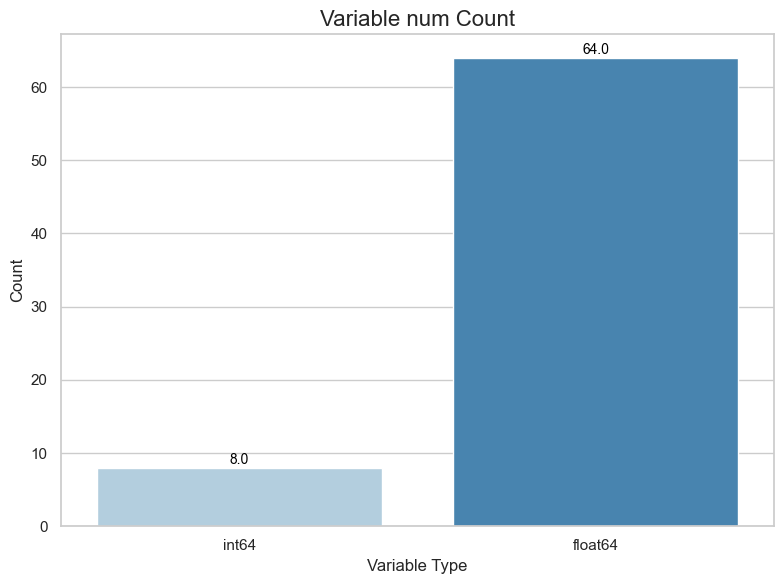

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='type', y='count_num', data=num_vars_count, palette="Blues")

# Añadir etiquetas con el total encima de cada barra
for bar in ax.patches:  # `ax.patches` contiene las barras del gráfico
    total = bar.get_height()  # Obtener la altura de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posición en X centrada
        total + 0.5,                        # Posición en Y un poco arriba
        f'{total}',                         # Texto con el total
        ha='center', fontsize=10, color='black'
    )

# Añadir títulos y etiquetas
plt.title('Variable num Count', fontsize=16)
plt.xlabel('Variable Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La tabla muestra que la mayoría de las variables numéricas son de tipo float64 (64), lo que indica que representan datos continuos NO enteros. Solo 8 variables son de tipo int64, sugiriendo que algunas variables numéricas son discretas, como contadores o índices. Esto refuerza la idea de que el análisis debe centrarse en datos continuos, pero también considerar las transformaciones necesarias para las variables categóricas y booleanas. En general, la estructura del dataset es principalmente continua.

Para no hacer el notebook demasiado largo se van a guardar los avances y se va a continuar en otro

In [29]:
df_loans.to_csv("../data/interim/df_loans_N1.csv")